# Homework Week 01
Nicola Zomer <br>
18 October, 2022

For the full derivation of the equations (or the solutions of the analytical points) see the attached pdf. 

## Exercise 1
### a) Compare numerically the solution of the Quasi Stationary Approximation (QSA) of the Consumer Resource Model with 1 species and 1 abiotic resource with the full solution. 

The Consumer Resource Model with 1 species and 1 abiotic resource is described by the following system of differential equation:
$$
\begin{align}
    \frac{dR}{dt} &= \mu(R) - cRN \\
    \frac{dN}{dt} &= (\gamma cR-d)N 
\end{align}
$$
where for abiotic resources, $\mu(R)$ is given by the Monod function:
$$
    \mu(R)=\frac{R}{k_s+R}
$$

The solution of the QSA of the Consumer Resource Model with 1 species and 1 abiotic resource is given by:
$$
\begin{align}
    R^* &= \frac{1-cNk_s}{cN} \\
    N(t)&=\left[N_0-\frac{\tilde{a}}{\tilde{b}}\right]e^{-\tilde{b}t}+\frac{\tilde{a}}{\tilde{b}}
\end{align}
$$
where we defined $\tilde{a}=\gamma$ and $\tilde{b}=\gamma c k_s+d$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

# parameters of the model
ks = 1
c = 0.02
d = 0.4
gamma = 2

# initialization
N0 = 20
R0 = (1-c*N0*ks)/(c*N0)

print('R0 =', R0)

# function computing the derivative
def derivative(y, time):
    '''
    y = (R, N)
    '''
    
    Rdot = y[0]/(ks+y[0])-c*y[0]*y[1]
    Ndot = (gamma*c*y[0]-d)*y[1]
    
    return [Rdot, Ndot]

# QSA solution
def qsa_function(time):
    atilde = gamma
    btilde = gamma*c*ks+d
    
    Nt = (N0-atilde/btilde)*np.exp(-btilde*time)+atilde/btilde
    Rstar = (1-c*Nt*ks)/(c*Nt)
    
    return [Rstar, Nt]

# define the interval
time_vec = np.linspace(0, 200, 201)

# QSA 
y_approx = qsa_function(time_vec)
if (sum(y_approx[0]<0)>0):
    print('Check the values of the parameters and of the initial condition for R and N: R* cannot be negative!!')

# full solution: call the odeint() method
y = odeint(derivative, y0=[R0, N0], t=time_vec)



R0 = 1.4999999999999998


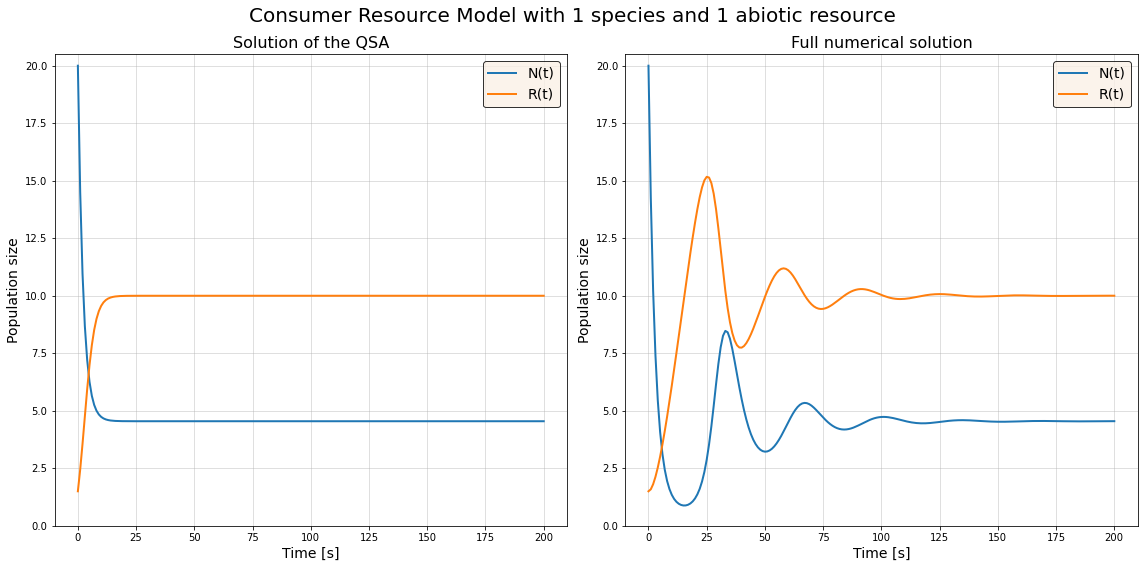

In [4]:
# plot the results
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Consumer Resource Model with 1 species and 1 abiotic resource', fontsize=20)

# QSA
ax0.plot(time_vec, y_approx[1], linewidth=2, label='N(t)')
ax0.plot(time_vec, y_approx[0], linewidth=2, label='R(t)')
ax0.set_xlabel('Time [s]', fontsize=14)
ax0.set_ylabel('Population size', fontsize=14)
ax0.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax0.grid(alpha=0.5)
ax0.set_ylim([0, 20.5])

ax0.set_title('Solution of the QSA', fontsize=16)

# full solution
ax1.plot(time_vec, y[:, 1], linewidth=2, label='N(t)')
ax1.plot(time_vec, y[:, 0], linewidth=2, label='R(t)')
ax1.set_xlabel('Time [s]', fontsize=14)
ax1.set_ylabel('Population size', fontsize=14)
ax1.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax1.grid(alpha=0.5)
ax1.set_ylim([0, 20.5])

ax1.set_title('Full numerical solution', fontsize=16)

plt.tight_layout()
plt.show()

#### Comparison of the QSA solution and the full solution in a single plot

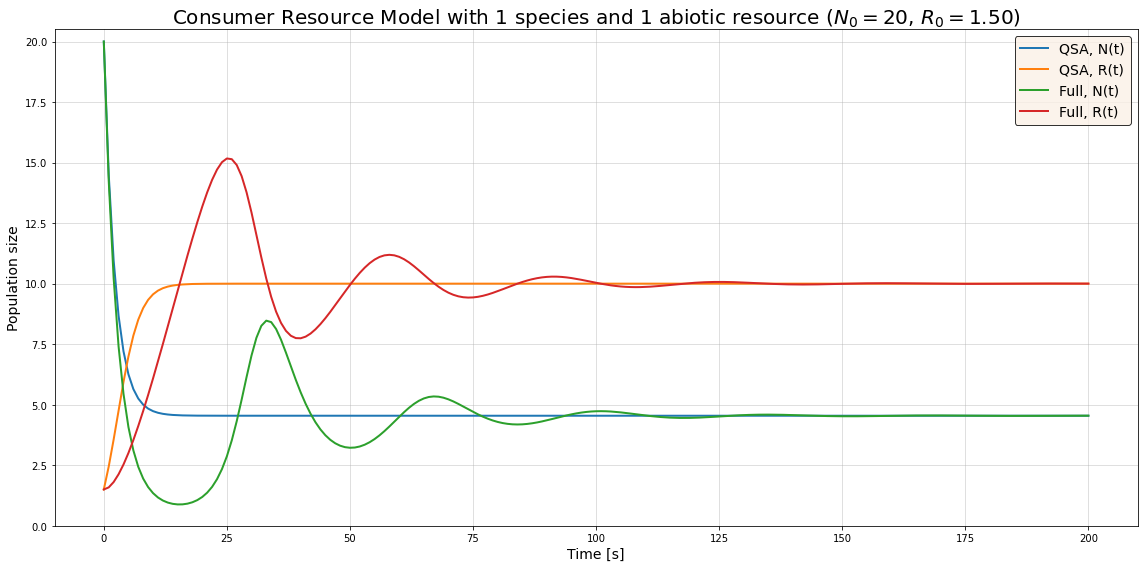

In [7]:
# plot the results
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.set_title('Consumer Resource Model with 1 species and 1 abiotic resource ($N_0=%i$, $R_0=%.2f$)' %(N0, R0), fontsize=20)

# QSA
ax.plot(time_vec, y_approx[1], linewidth=2, label='QSA, N(t)')
ax.plot(time_vec, y_approx[0], linewidth=2, label='QSA, R(t)')
ax.plot(time_vec, y[:, 1], linewidth=2, label='Full, N(t)')
ax.plot(time_vec, y[:, 0], linewidth=2, label='Full, R(t)')
ax.set_xlabel('Time [s]', fontsize=14)
ax.set_ylabel('Population size', fontsize=14)
ax.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')
ax.grid(alpha=0.5)
ax.set_ylim([0, 20.5])

plt.tight_layout()
plt.show()

### b) Optional: find a regime of parameters where the QSA is good. Remember to check that parameters you choose and initial condition for R and N should be so that R* in the QSA is not negative.
The set of parameters used in point a) represent a regime where the QSA is good, as it is possible to see from the plots. 